# Template Matching Chord Recognition, *Francesco Maccarini*

## Project for the *Audio Signals* course @ Polimi

In this notebook we aim at providing a python implementation of the chord recognition algorithm based on template matching, as presented in: "Müller, Meinard. (2015). *Fundamentals of Music Processing.* 10.1007/978-3-319-21945-5."

### Introduction

We start by constructing the templates for major and minor triads. In chroma representation, every chord is characterized by a 1 in correspndence to those notes that are present in the chord and a 0 in correspondence to those notes that are not present in the chord.

Remember that chroma values are mapped to notes as 
\[ C, C#, D, D#, E, F, F#, G, G#, A, A#, B \]

***

**Example:** C major chord is composed by the notes C, E and G so its chorma representation will be \[ 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0 \]

In [1]:
triads_labs=["C","C#","D","D#","E","F","F#","G","G#","A","A#","B","Cm","C#m","Dm","D#m","Em","Fm","F#m","Gm","G#m","Am","A#m","Bm"]
chroma_labs=["C","C#","D","D#","E","F","F#","G","G#","A","A#","B"]
print("Labels for possible triads:")
print(triads_labs)
print("Major triads:")
print(triads_labs[0:12])
print("Minor triads:")
print(triads_labs[12:])
print("Chroma values (notes):")
print(chroma_labs)

Labels for possible triads:
['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B', 'Cm', 'C#m', 'Dm', 'D#m', 'Em', 'Fm', 'F#m', 'Gm', 'G#m', 'Am', 'A#m', 'Bm']
Major triads:
['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
Minor triads:
['Cm', 'C#m', 'Dm', 'D#m', 'Em', 'Fm', 'F#m', 'Gm', 'G#m', 'Am', 'A#m', 'Bm']
Chroma values (notes):
['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']


In [2]:
import numpy as np

In [3]:
#create chroma templates for chords
chords=np.zeros(shape=(12,len(triads_labs)))
for i in range(chords.shape[1]): #loop on possible triads
    if(i<12):
        chords[(0+i)%12,i]=1
        chords[(4+i)%12,i]=1
        chords[(7+i)%12,i]=1
    if(i>=12):
        chords[(0+i)%12,i]=1
        chords[(3+i)%12,i]=1
        chords[(7+i)%12,i]=1
print(chords)

[[1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.]]


In [4]:
import matplotlib.pyplot as plt
import librosa.display as dspl

Text(0.5, 1.0, 'Chroma representation of major and minor triads')

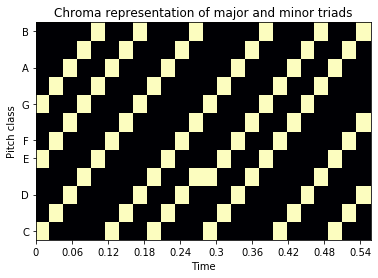

In [5]:
plt.figure()
dspl.specshow(chords, y_axis='chroma', x_axis='time')
plt.title("Chroma representation of major and minor triads")

### Load audio file

In [6]:
from tkinter import filedialog
from tkinter import *

from librosa import *

import ntpath

In [7]:
# Select the file to analyze
root = Tk()
root.filename =  filedialog.askopenfilename(initialdir = "/",title = "Select an audio file",filetypes = (("all files","*.*"),("jpeg files","*.jpg")))
if(root.filename):
    print ("Selected file path:",root.filename)
    name=ntpath.basename(root.filename)
    print ("Selected file name:",name)
else:
    print ("Please select a file!")
root.destroy()

Selected file path: D:/Francesco Maccarini/Documents/Samples/Cymatics - Posty Hip Hop Sample Pack/Guitar Loops/Cymatics - Posty Guitar Loop 1 - 140 BPM D# Maj.wav
Selected file name: Cymatics - Posty Guitar Loop 1 - 140 BPM D# Maj.wav


In [8]:
# loading file with librosa
music,sr=load(root.filename)

# WARNING: You need to have ffmpeg insalled in order to open mp3 files
# If you are using conda/anaconda runnig the following in the command prompt should fix the problem:
# conda install -c conda-forge ffmpeg

print("Sampling rate:",sr)

Sampling rate: 22050


In [9]:
import matplotlib.pyplot as plt
import librosa.display as dspl

Text(0.5, 1.0, 'Opened music file: Cymatics - Posty Guitar Loop 1 - 140 BPM D# Maj.wav')

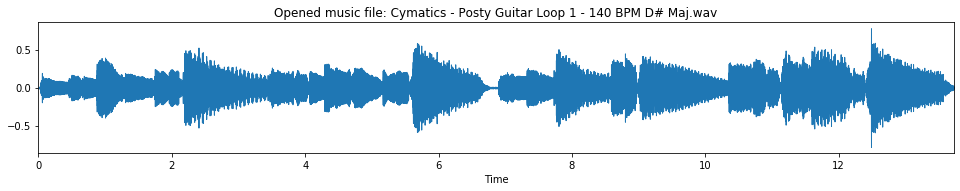

In [10]:
plt.figure(figsize=(16.4, 2.4))
dspl.waveplot(music,sr)
plt.title("Opened music file: "+name)

In [11]:
# Computing chromagram
import librosa.feature as feat
chroma=feat.chroma_cens(y=music, sr=sr)

In [12]:
print(chroma)
print(chroma.shape)

[[0.1032504  0.09449991 0.08643731 ... 0.19624061 0.1818637  0.16739531]
 [0.18207923 0.16827803 0.15508436 ... 0.20764677 0.21036874 0.21335261]
 [0.58435655 0.58762255 0.59018443 ... 0.2108476  0.22739631 0.24422358]
 ...
 [0.06145336 0.05829139 0.05621971 ... 0.1661123  0.17260051 0.17972993]
 [0.23346181 0.22672564 0.22060195 ... 0.20778726 0.21693527 0.22546809]
 [0.06236664 0.05807982 0.05458476 ... 0.23665575 0.23292666 0.2284323 ]]
(12, 592)


Text(0.5, 1.0, 'Chroma representation of Cymatics - Posty Guitar Loop 1 - 140 BPM D# Maj.wav')

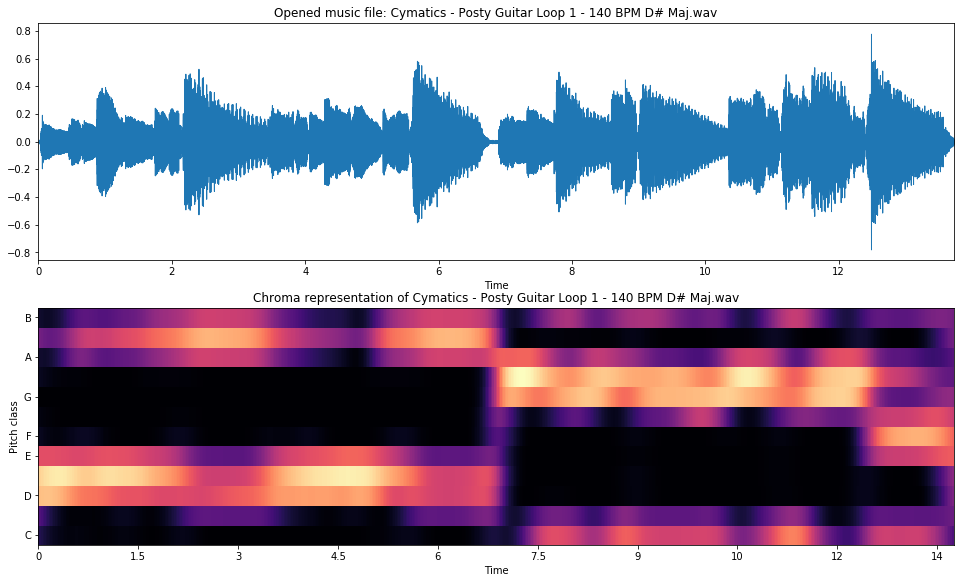

In [13]:
plt.figure(figsize=(16.4, 9.6))
plt.subplot(2,1,1)
dspl.waveplot(music,sr)
plt.title("Opened music file: "+name)
plt.subplot(2,1,2)
dspl.specshow(chroma, y_axis='chroma', x_axis='time')
plt.title("Chroma representation of "+name)